# Libraries for general processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV

### Model Libraries

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\utsav\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data Exploration

In [3]:
data = pd.read_csv('creditcard.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(data.shape)
print(data.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null 

### Statistical Description of Data

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Skewness of Data

In [5]:
data.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

### Visualization of Distribution of Data

C:\Users\utsav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


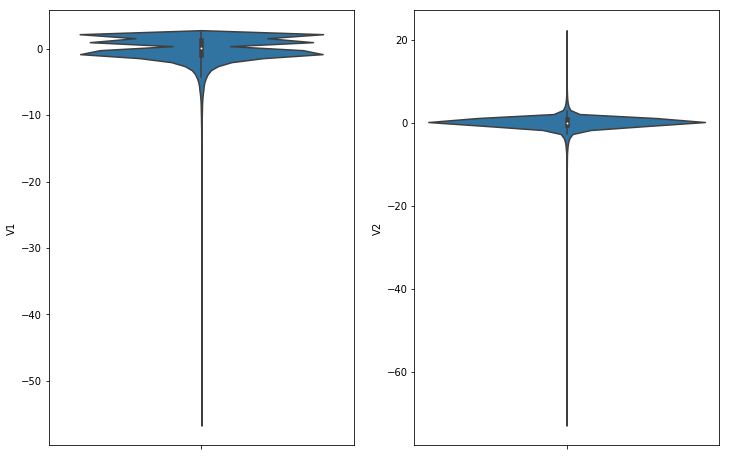

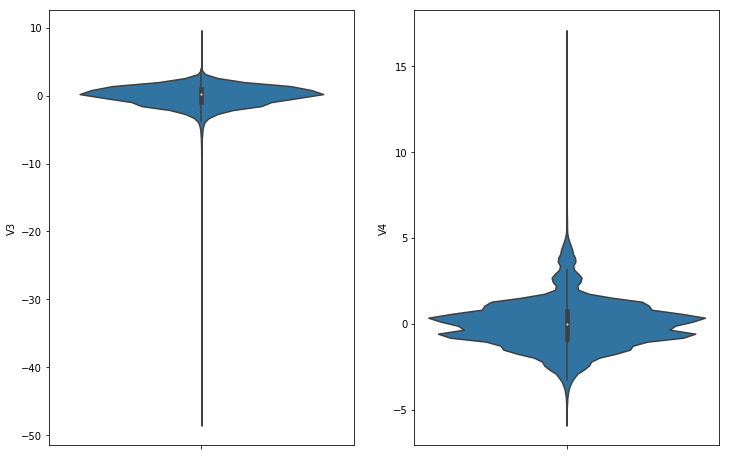

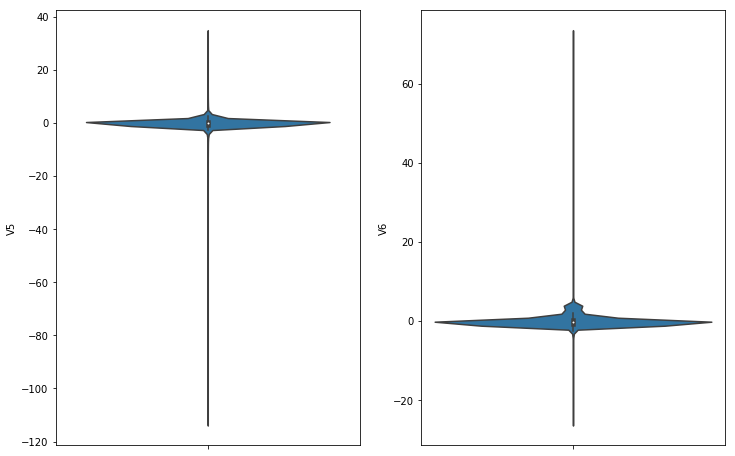

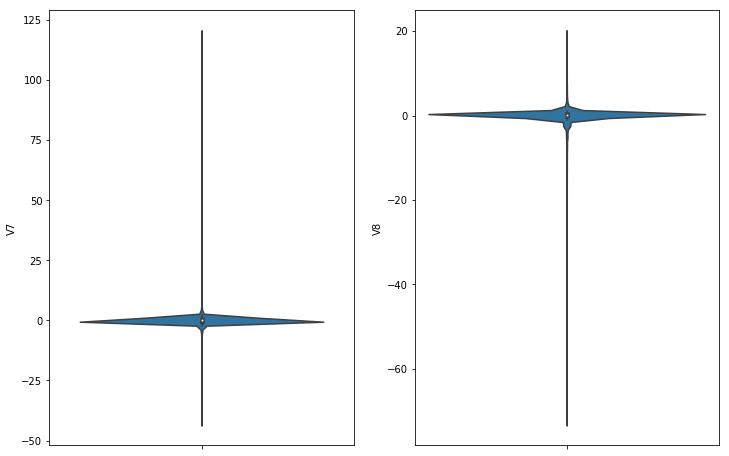

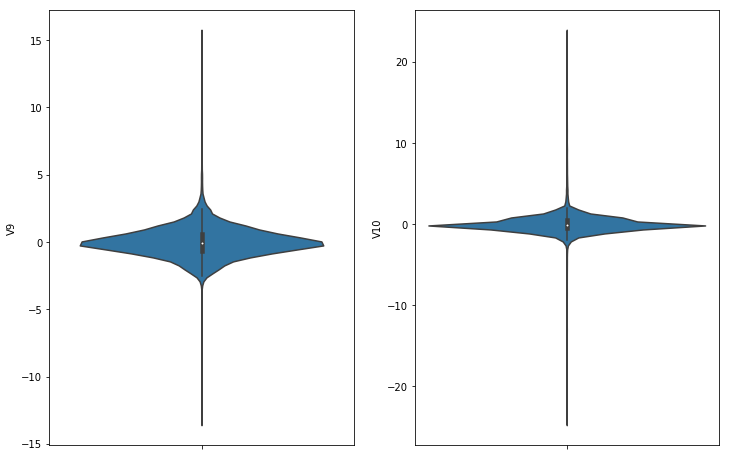

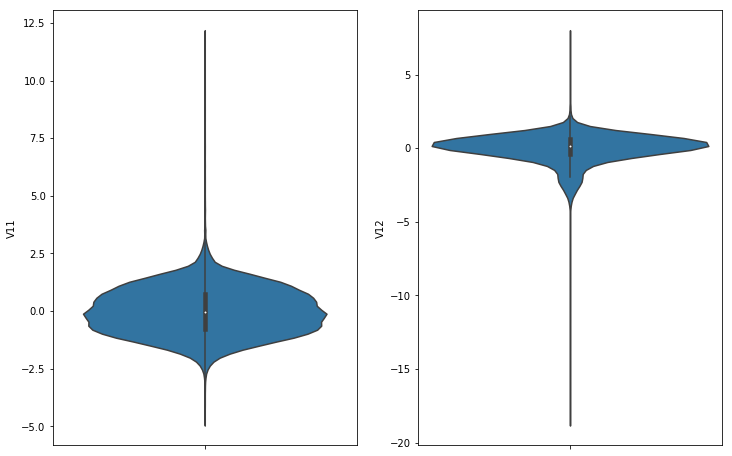

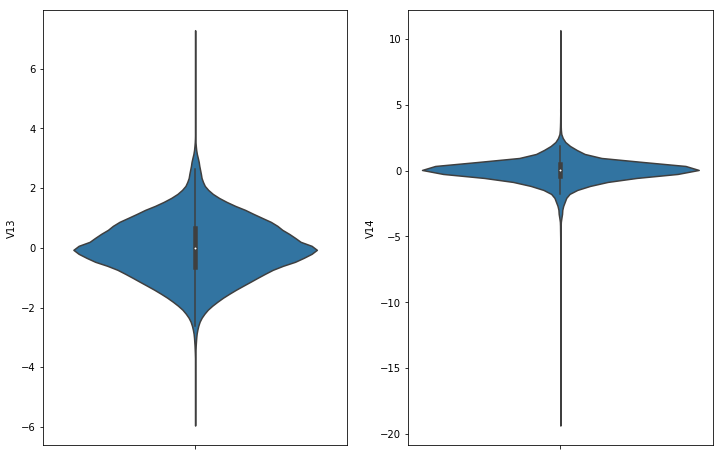

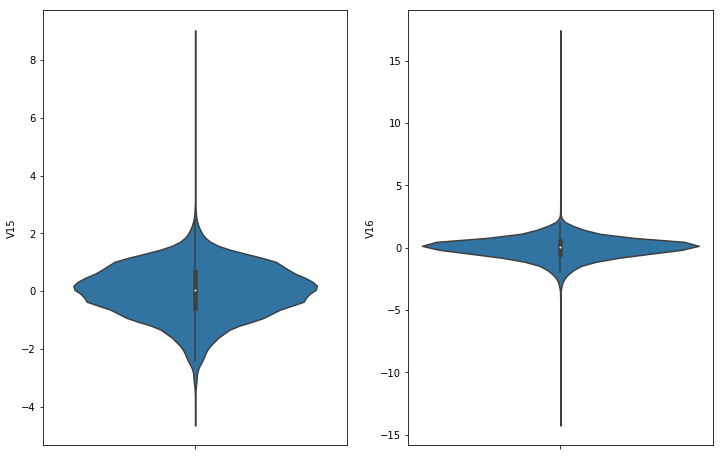

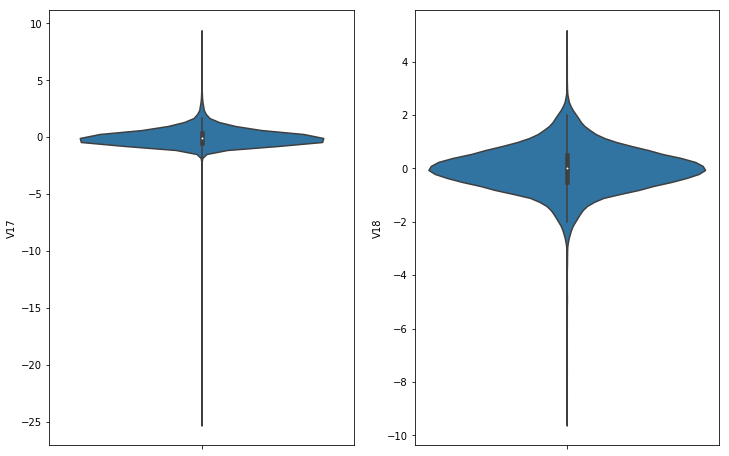

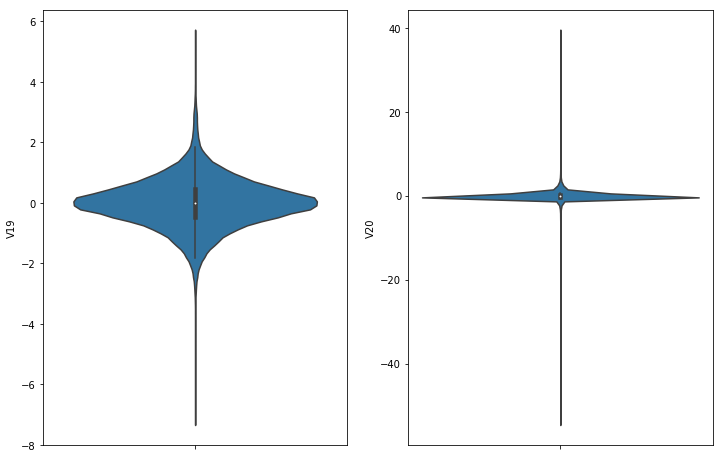

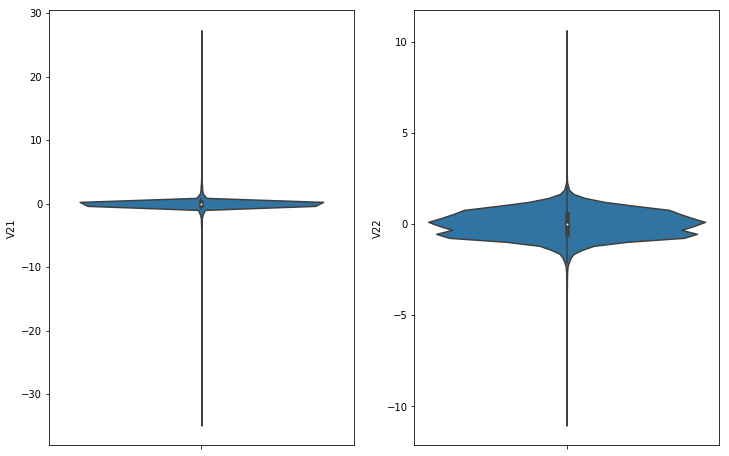

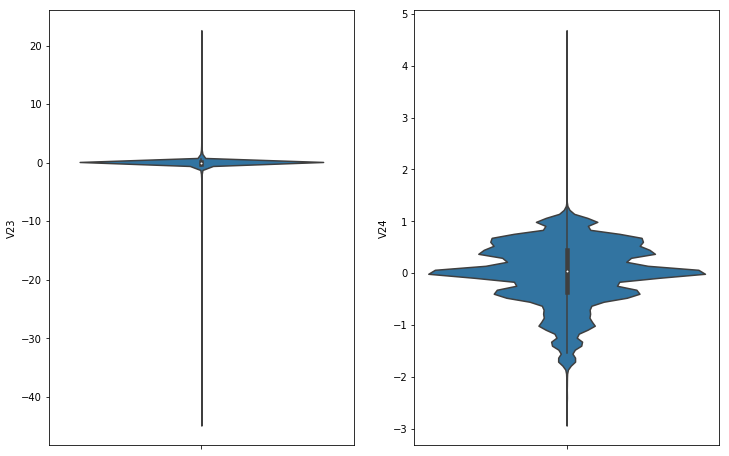

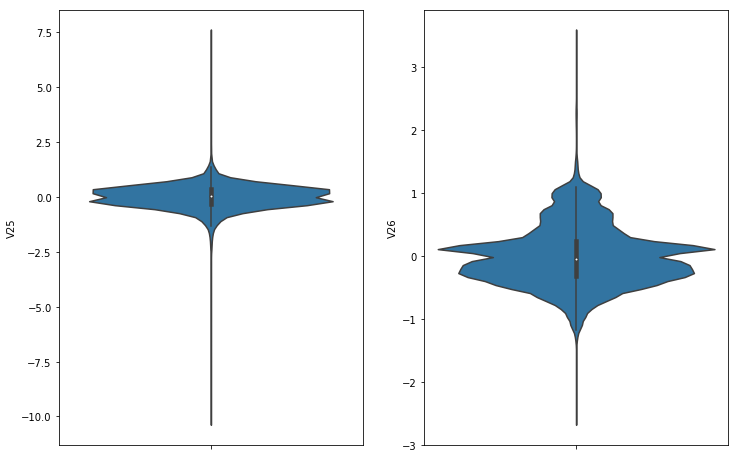

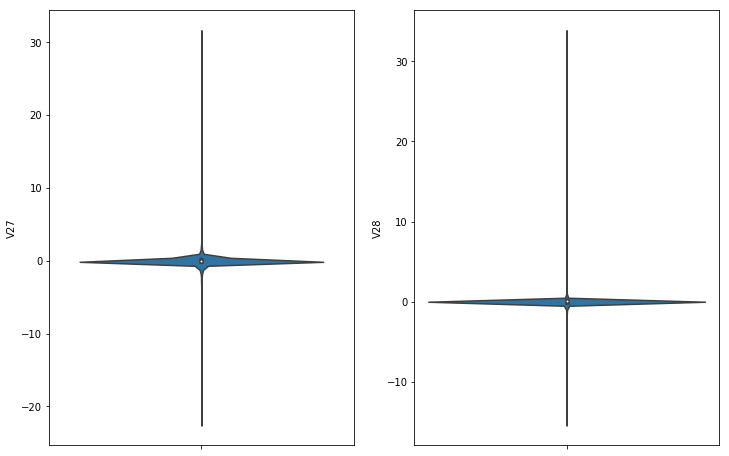

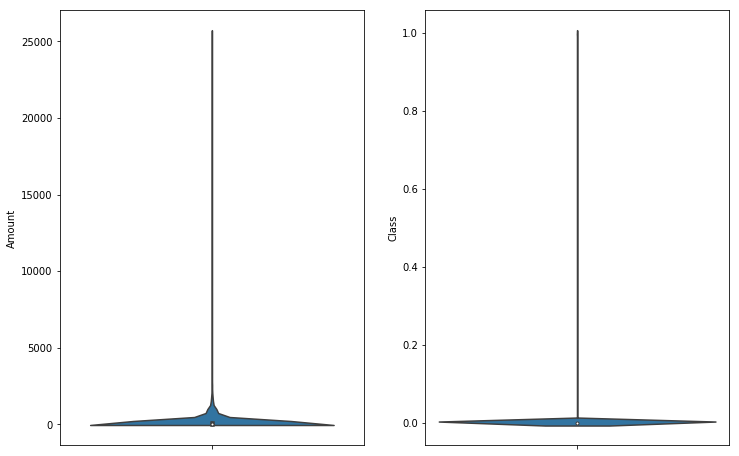

In [6]:
n_cols = 2
n_rows = 15
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=data.columns[(i*n_cols+j+1)], data=data, ax=ax[j])
    plt.plot()

### Correlation Analysis

V2 and Amount = -0.53


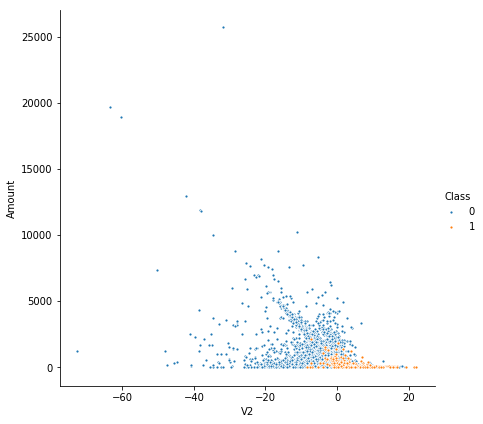

V7 and Amount = 0.40


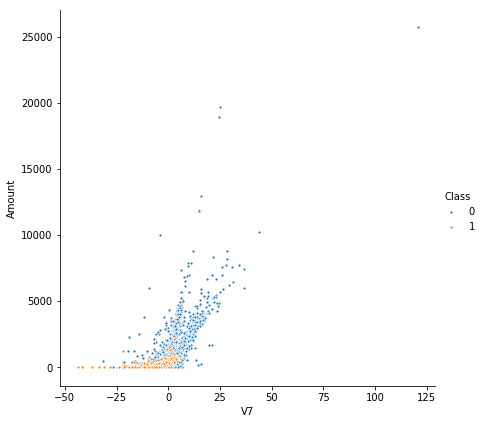

V5 and Amount = -0.39


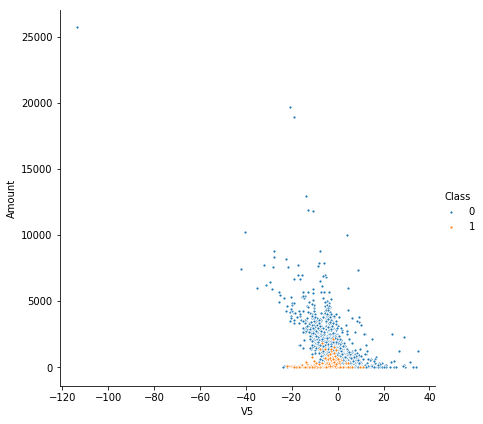

V20 and Amount = 0.34


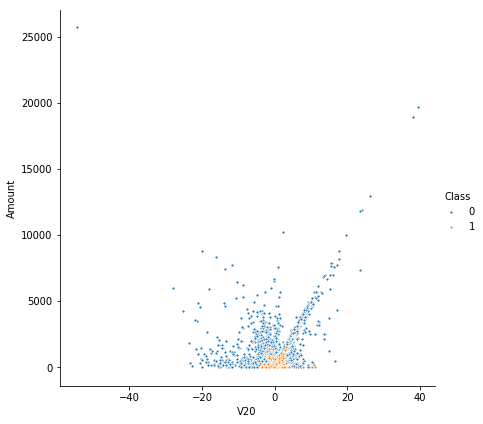

In [7]:
data_corr = data.corr()
threshold = 0.25
corr_list = []
for i in range(1,30):
    for j in range(i+1,30): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index           
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (data.columns[i],data.columns[j],v))
    sns.pairplot(data, height=6, x_vars=data.columns[i],y_vars=data.columns[j],hue = data.columns[-1],markers= '.')
    plt.show()

### Descriptions of amounts for Fradulent and Normal Cases

In [8]:
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# Splitting Test and Training Data

In [9]:
train,test = train_test_split(data,stratify = data.iloc[:,-1])

In [10]:
X_train = train.loc[:, train.columns != 'Class']
y_train = train.loc[:, train.columns == 'Class']
print('% of fraud cases in training dataset: ' + str(train.Class.mean()*100))
X_test = test.loc[:, train.columns != 'Class']
y_test = test.loc[:, train.columns == 'Class']
print('% of fraud cases in test dataset: ' + str(test.Class.mean()*100))

% of fraud cases in training dataset: 0.17274876524425925
% of fraud cases in test dataset: 0.17274795651807534


# Feature Importances

In [11]:
rfc_best = RandomForestClassifier(n_estimators=150,max_depth=7,random_state = 0,n_jobs=-1)
rfc_best.fit(X_train,y_train.values.reshape(-1,))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Important features: ['V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']


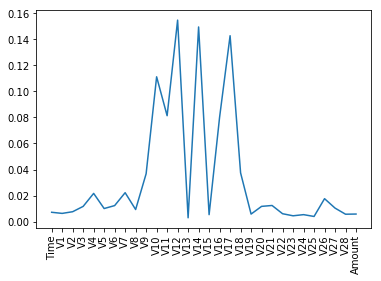

In [13]:
n_imp_features = []
imp_features = []
for x in range(0,len(rfc_best.feature_importances_)):
    if(rfc_best.feature_importances_[x]<rfc_best.feature_importances_.mean()):
        n_imp_features.append(data.columns[x])
    else:
        imp_features.append(data.columns[x])
print("Important features: "+ str(imp_features))
plt.plot(data.columns[:-1],rfc_best.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## KMeans Clustering - Training and Evaluation

In [14]:
n_X_train = normalize(X_train.drop(n_imp_features,axis=1))
n_X_test = normalize(X_test.drop(n_imp_features,axis=1))
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(n_X_train)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Training Accuracy :
0.4872685564476487

Recall metric in the training dataset:  0.4986449864498645


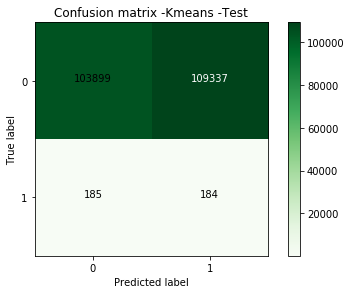

In [15]:
kmeans_pred_train=kmeans.predict(n_X_train)
cnf_m = confusion_matrix(y_train,kmeans_pred_train)
reassignflag=False
if cnf_m[0][0]+cnf_m[1][1]<cnf_m[1][0]+cnf_m[0][1]:
    # clustering is opposite of original classification
    reassignflag=True
if reassignflag:
    kmeans_pred_train_=1-kmeans_pred_train
print('Training Accuracy :')
print((kmeans_pred_train == y_train.values.reshape(1,-1)).mean())
cnf_m = confusion_matrix(y_train,kmeans_pred_train)
np.set_printoptions(precision=2)
print("\nRecall metric in the training dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix -Kmeans -Test')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## KMeans Clustering - Testing and Evaluation

Testing Accuracy :
0.513581079183169

Recall metric in the testing dataset:  0.4878048780487805


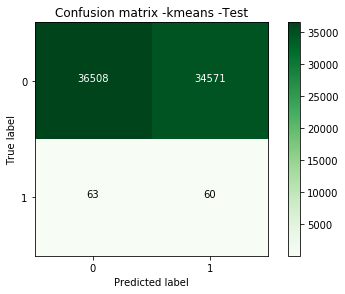

In [16]:
kmeans_pred_test=kmeans.predict(n_X_test)
if reassignflag:
    kmeans_pred_test=1-kmeans_pred_test
print('Testing Accuracy :')
print((kmeans_pred_test == y_test.values.reshape(1,-1)).mean())
cnf_m = confusion_matrix(y_test,kmeans_pred_test)
np.set_printoptions(precision=2)
print("\nRecall metric in the testing dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix -kmeans -Test')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.4
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

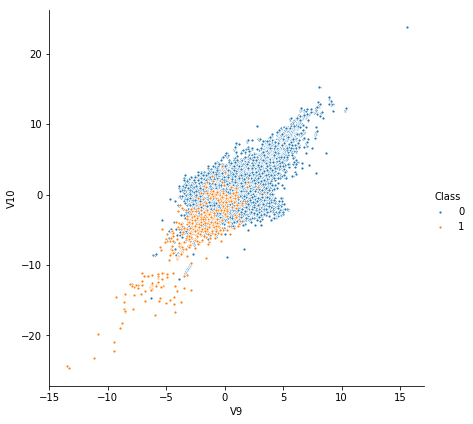

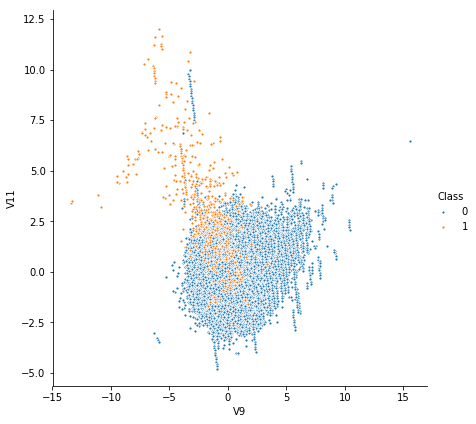

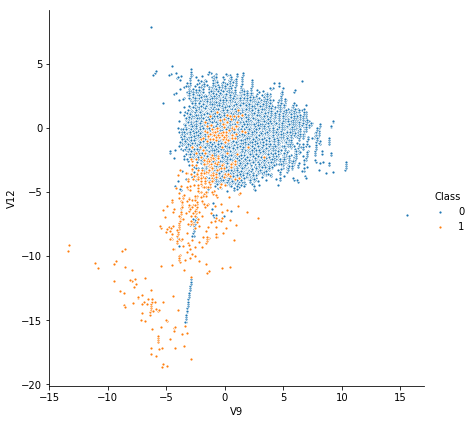

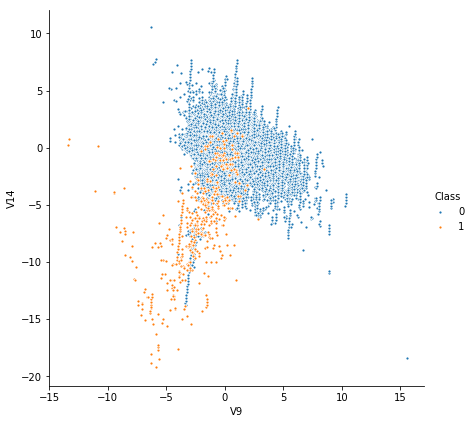

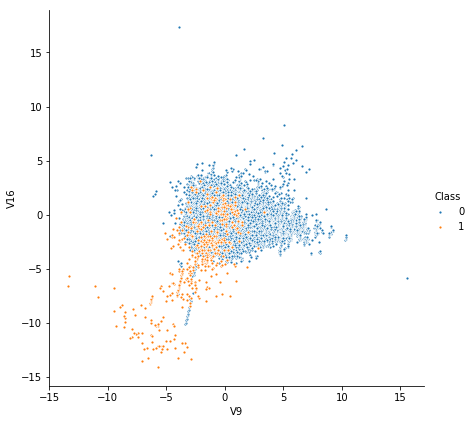

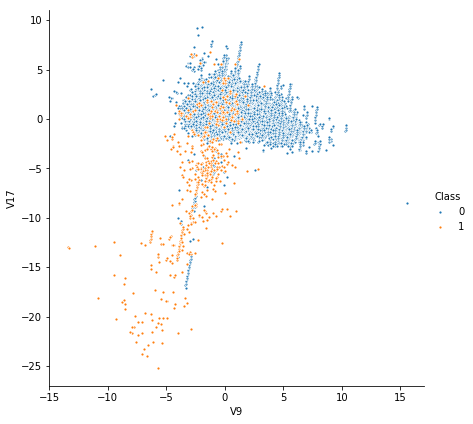

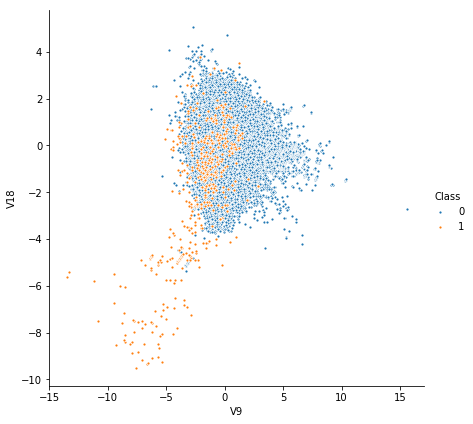

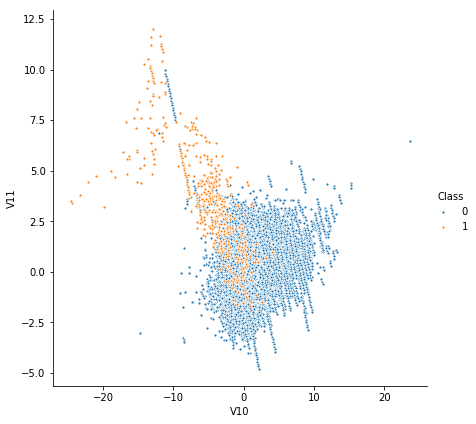

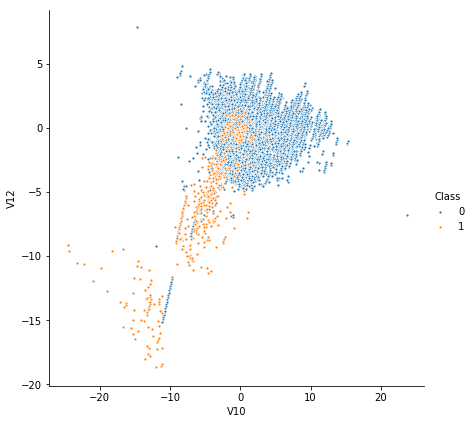

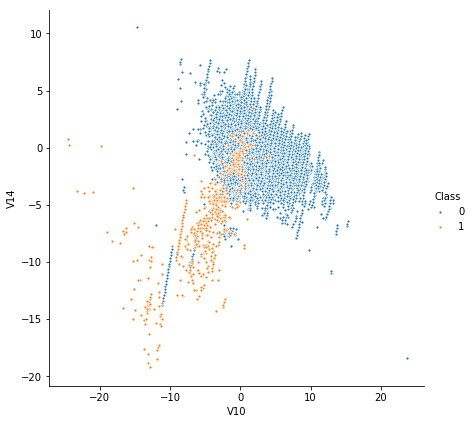

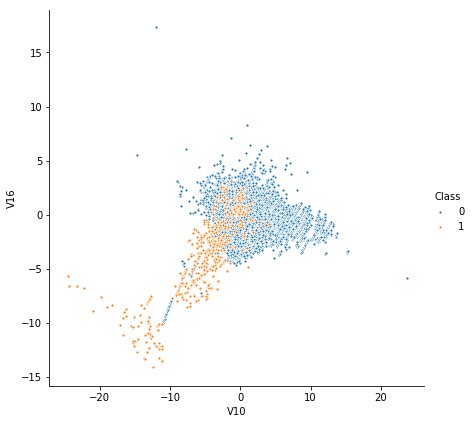

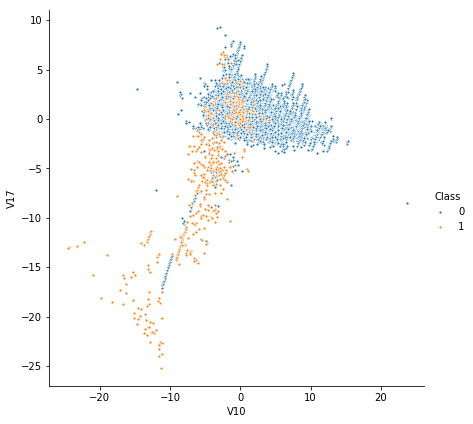

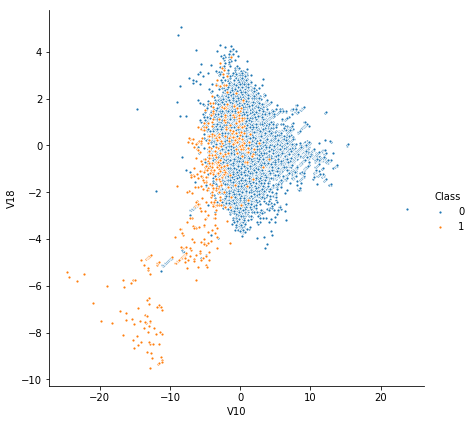

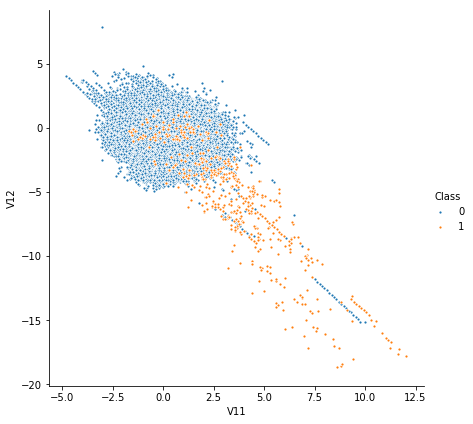

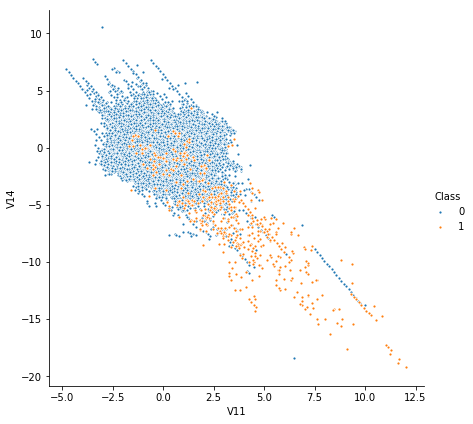

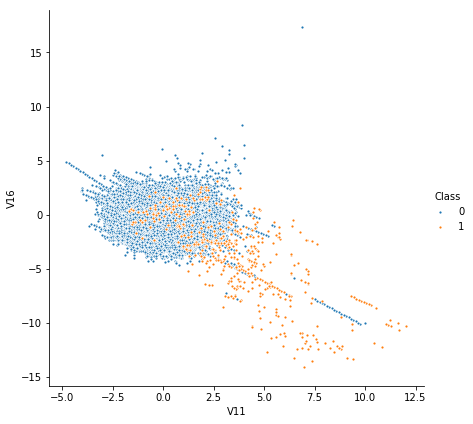

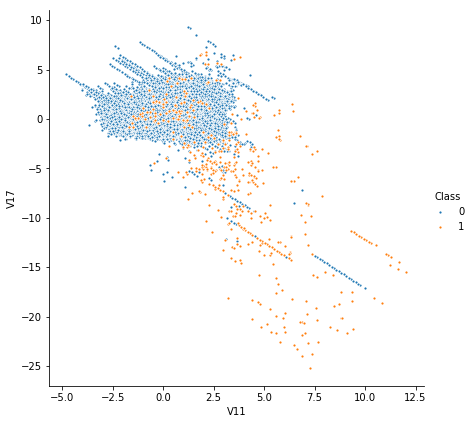

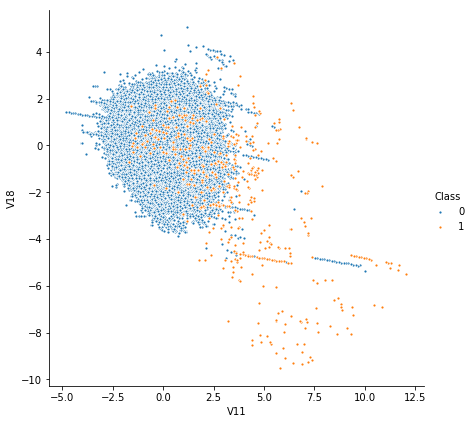

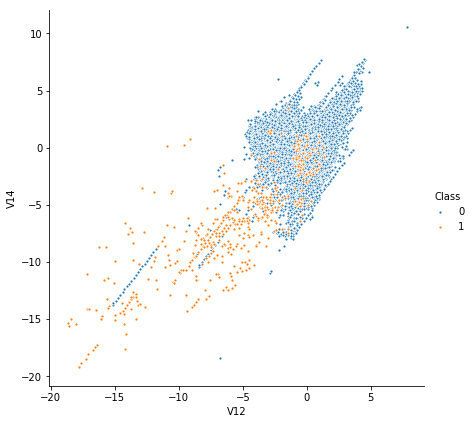

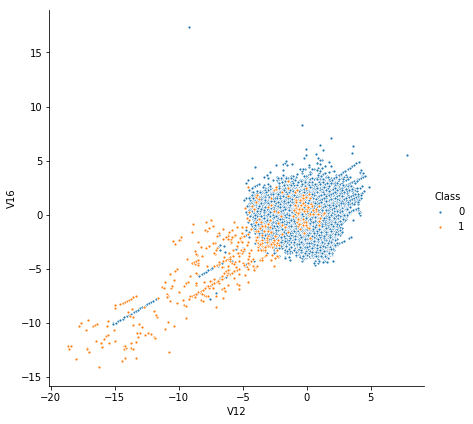

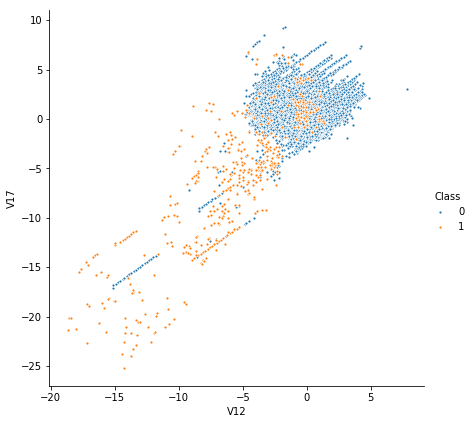

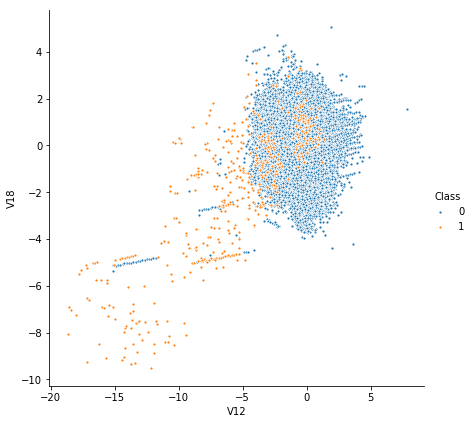

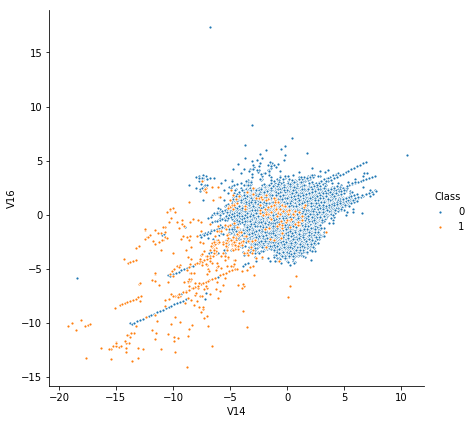

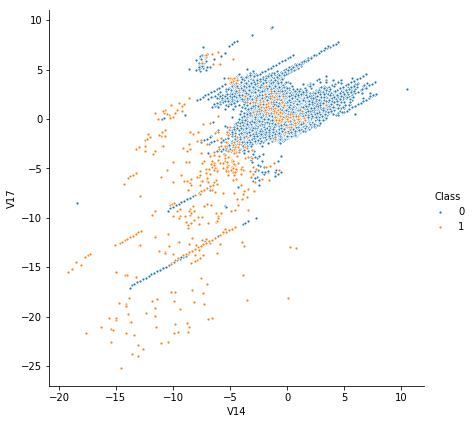

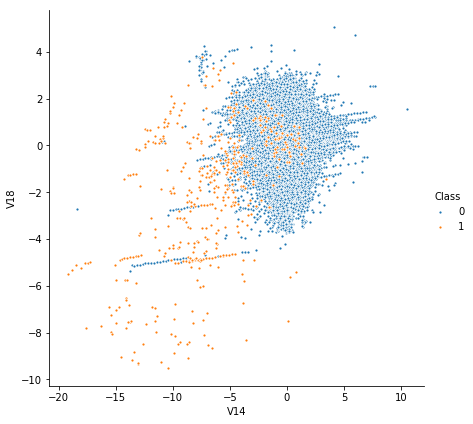

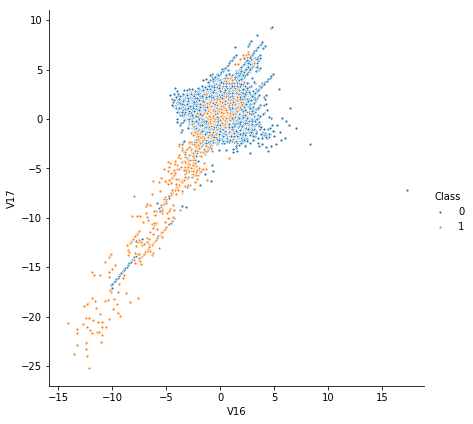

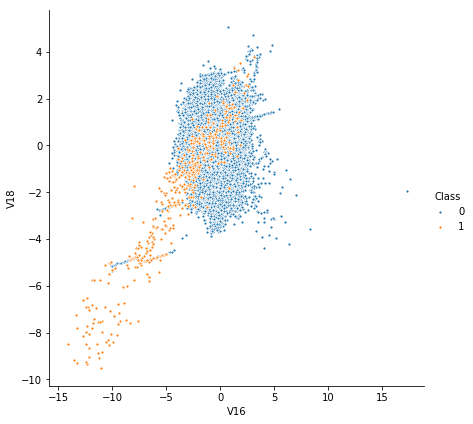

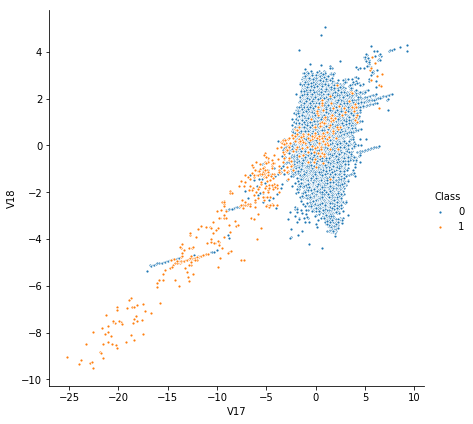

In [17]:
for i in range(0,len(imp_features)):
    for j in range(i+1,len(imp_features)): #avoid repetition
        sns.pairplot(data,x_vars=imp_features[i],y_vars=imp_features[j],hue = data.columns[-1],markers='.',height = 6)
        plt.show()

## KNN Clustering and Classification - Training and Evaluation

C:\Users\utsav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training Accuracy :
0.9994663046277007

Recall metric in the training dataset:  0.7696476964769647


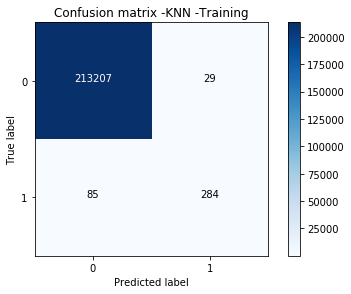

In [18]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",n_jobs=-1)
knn.fit(n_X_train,y_train.values)
knn_pred_train=knn.predict(n_X_train)
print('Training Accuracy :')
print((knn_pred_train == y_train.values.reshape(1,-1)).mean())
cnf_m = confusion_matrix(y_train,knn_pred_train)
np.set_printoptions(precision=2)
print("\nRecall metric in the training dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix -KNN -Training')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy :
0.9995365298727564

Recall metric in the training dataset:  0.8292682926829268


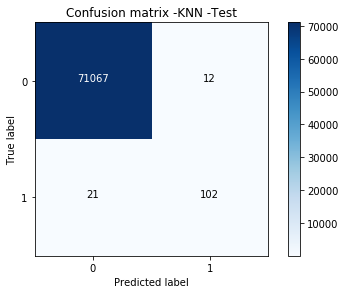

In [19]:
knn_pred_test=knn.predict(n_X_test)
print('Accuracy :')
print((knn_pred_test == y_test.values.reshape(1,-1)).mean())
cnf_m = confusion_matrix(y_test,knn_pred_test)
np.set_printoptions(precision=2)
print("\nRecall metric in the training dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix -KNN -Test')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Grid Search CV with KNN

In [20]:
knn=KNeighborsClassifier(algorithm="kd_tree",n_jobs=-1)
params_knn = {'n_neighbors': np.arange(1,5)}
knn_gs = GridSearchCV(knn,params_knn,cv=5,scoring = 'f1',n_jobs=-1)
print(knn_gs)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)


C:\Users\utsav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Training Accuracy :
0.9995739800098312
{'n_neighbors': 3}

Recall metric in the training dataset:  0.8048780487804879


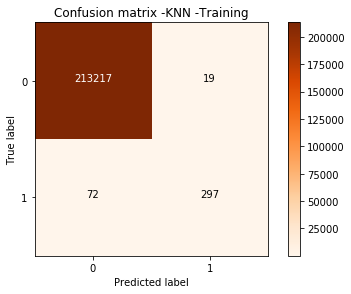

In [21]:
knn_gs.fit(n_X_train,y_train.values.reshape(-1,1))
knn_pred_train=knn_gs.predict(n_X_train)
print('Training Accuracy :')
print((knn_pred_train == y_train.values.reshape(1,-1)).mean())
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
cnf_m = confusion_matrix(y_train,knn_pred_train)
np.set_printoptions(precision=2)
print("\nRecall metric in the training dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion matrix -KNN -Training')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy :
0.999522485323446

Recall metric in the training dataset:  0.8130081300813008


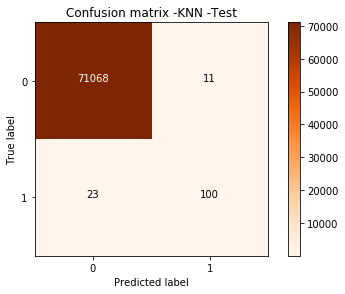

In [22]:
knn_pred_test = knn_best.predict(n_X_test)
print('Accuracy :')
print((knn_pred_test == y_test.values.reshape(1,-1)).mean())
cnf_m = confusion_matrix(y_test,knn_pred_test)
np.set_printoptions(precision=2)
print("\nRecall metric in the training dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion matrix -KNN -Test')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## XGB Classifier- GBT (Training and Evaluation)

In [23]:
fraud_i = train[train.Class == 1].index
genuine_i = train[train.Class == 0].index
rand_genuine_i = np.array(np.random.choice(genuine_i, int(len(fraud_i)*1.035), replace = False))
subset_d = train.loc[np.concatenate([fraud_i,rand_genuine_i]),:]
X_sample = subset_d.loc[:, subset_d.columns != 'Class']
y_sample = subset_d.loc[:, subset_d.columns == 'Class']
X_sample.shape

(750, 30)

C:\Users\utsav\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utsav\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy :
0.9490180473303528
Recall metric in the training dataset:  0.9539295392953929


C:\Users\utsav\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


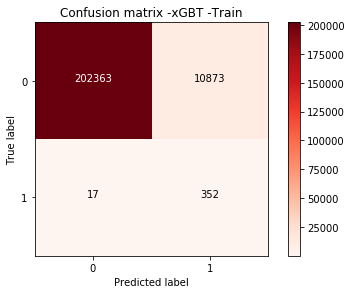

In [41]:
alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,objective='binary:logistic',scale_pos_weight=1, seed=0)
cvresult = xgb.cv(alg.get_xgb_params(),xgb.DMatrix(X_sample.values, label=y_sample.values), num_boost_round=alg.get_params()['n_estimators'], nfold=5,early_stopping_rounds=50)
alg.set_params(n_estimators=cvresult.shape[0])
alg.fit(X_sample, y_sample.values, eval_metric='rmse')
predictions = alg.predict(X_train)
print('Training Accuracy :')
print((predictions == y_train.values.reshape(1,-1)).mean())
cnf_matrix = confusion_matrix(y_train,predictions)
np.set_printoptions(precision=2)
print("Recall metric in the training dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix -xGBT -Train')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
cnf_m = cnf_matrix
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## XGB Classifier- GBT (Testing and Evaluation)

Testing Accuracy :
0.9487935732142355
Recall metric in the testing dataset:  0.9186991869918699


C:\Users\utsav\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


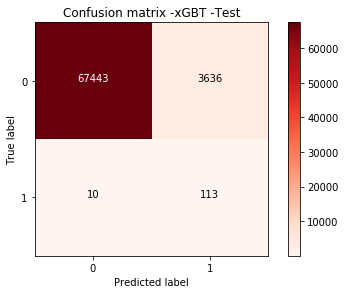

Feature Importances


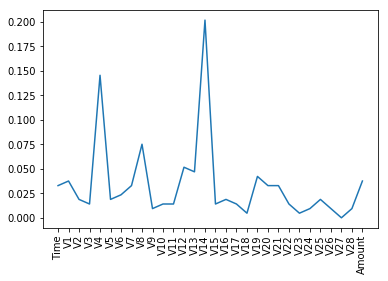

In [42]:
pred_test = alg.predict(X_test)
print('Testing Accuracy :')
print((pred_test == y_test.values.reshape(1,-1)).mean())
cnf_m = confusion_matrix(y_test,pred_test)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix -xGBT -Test')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Feature Importances')
plt.plot(data.columns[:-1],alg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Comparisons of importances given to features

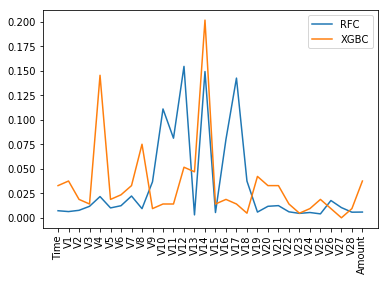

In [43]:
plt.plot(data.columns[:-1],rfc_best.feature_importances_,label='RFC')
plt.plot(data.columns[:-1],alg.feature_importances_,label='XGBC')
plt.xticks(rotation=90)
plt.legend()
plt.show()